In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.plot import show
import glob,os

model_id_nomask = "vosvg9hw"
model_id_inception = "5zimc5w6"
model_id_mask = "leuo8izn"

ev_gdf_mask = gpd.read_file("Output/Evaluation/"+model_id_mask+".shp")
target_yield = gpd.read_file("Input/Target/concat/target_yield.shp")
test_path = "Input/sentinel/test_data_from_drive/patches_all/test/"
county_bdry = gpd.read_file("Input/county_boundary/county_layer.shp")

<AxesSubplot: >

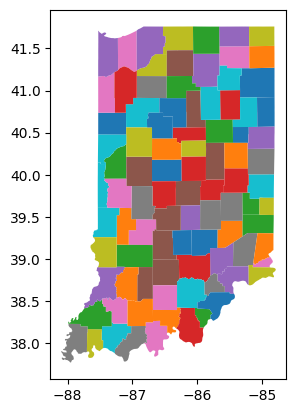

In [44]:
indiana_cnty = county_bdry[county_bdry["STATE_NAME"] == 'Indiana']
indiana_cnty.plot(column="NAME")

In [24]:
ev_gdf_mask

,patch_name,true_val,leuo8izn,geometry
0,Indiana_2020_july_3328-2816,3.800568,4.359397,"POLYGON ((-86.16658 40.10565, -86.30456 40.105..."
1,Indiana_2020_july_3072-3584,0.847230,0.613615,"POLYGON ((-86.30456 39.69170, -86.44254 39.691..."
2,Indiana_2019_july_2048-1024,1.534634,1.528363,"POLYGON ((-86.85649 41.07151, -86.99447 41.071..."
3,Indiana_2020_july_2048-4608,1.180629,0.908209,"POLYGON ((-86.85649 39.13978, -86.99447 39.139..."
4,Indiana_2018_july_4096-2560,3.304477,3.486326,"POLYGON ((-85.75264 40.24363, -85.89062 40.243..."
...,...,...,...,...
2004,Indiana_2018_july_3328-2304,3.036029,3.059095,"POLYGON ((-86.16658 40.38161, -86.30456 40.381..."
2005,Indiana_2018_july_4352-1280,3.789643,3.777598,"POLYGON ((-85.61466 40.93353, -85.75264 40.933..."
2006,Indiana_2018_july_1536-3328,1.589669,1.793813,"POLYGON ((-87.13245 39.82968, -87.27043 39.829..."
2007,Indiana_2020_july_3840-2048,4.302540,4.498885,"POLYGON ((-85.89062 40.51959, -86.02860 40.519..."


<AxesSubplot: >

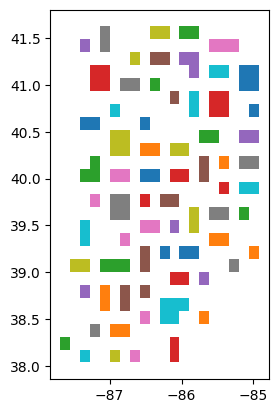

In [50]:
ev_gdf_mask.sjoin(indiana_cnty, how="inner", predicate="within").plot(column="NAME")

In [ ]:
zonal_stats(vectors=yield_inp_clip['geometry'], raster=i_patch,categorical=False,stats='count')

In [18]:
256*256

65536

In [22]:

soybean_pix1 = list()
for i in ev_gdf_mask["patch_name"]:
    # print(i)
    file = glob.glob(os.path.join(test_path,i+".tif"))
    patch_src = rio.open(file[0])
    mask = patch_src.read()[12]
    soybean_pix1.append(np.count_nonzero(mask))
    print(patch_src.bounds)
    break
# ev_gdf_mask["soybean_pixel_count1"] = soybean_pix1

BoundingBox(left=-86.3045629434421, bottom=40.10564518562969, right=-86.16658171580133, top=40.24362641327045)


In [20]:

soybean_pix = list()
for i in ev_gdf_mask["patch_name"]:
    # print(i)
    file = glob.glob(os.path.join(test_path,i+".tif"))
    patch_src = rio.open(file[0])
    mask = patch_src.read()[12]
    soybean_pix.append(np.count_nonzero(mask))
ev_gdf_mask["soybean_pixel_count"] = soybean_pix

In [21]:
ev_gdf_mask

,patch_name,true_val,leuo8izn,geometry,soybean_pixel_count
0,Indiana_2020_july_3328-2816,3.800568,4.359397,"POLYGON ((-86.16658 40.10565, -86.30456 40.105...",28829
1,Indiana_2020_july_3072-3584,0.847230,0.613615,"POLYGON ((-86.30456 39.69170, -86.44254 39.691...",5463
2,Indiana_2019_july_2048-1024,1.534634,1.528363,"POLYGON ((-86.85649 41.07151, -86.99447 41.071...",13084
3,Indiana_2020_july_2048-4608,1.180629,0.908209,"POLYGON ((-86.85649 39.13978, -86.99447 39.139...",8543
4,Indiana_2018_july_4096-2560,3.304477,3.486326,"POLYGON ((-85.75264 40.24363, -85.89062 40.243...",21877
...,...,...,...,...,...
2004,Indiana_2018_july_3328-2304,3.036029,3.059095,"POLYGON ((-86.16658 40.38161, -86.30456 40.381...",20089
2005,Indiana_2018_july_4352-1280,3.789643,3.777598,"POLYGON ((-85.61466 40.93353, -85.75264 40.933...",26944
2006,Indiana_2018_july_1536-3328,1.589669,1.793813,"POLYGON ((-87.13245 39.82968, -87.27043 39.829...",11628
2007,Indiana_2020_july_3840-2048,4.302540,4.498885,"POLYGON ((-85.89062 40.51959, -86.02860 40.519...",30598


In [6]:
target_yield

,patch_name,year,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min,ykg_by_e7,geometry
0,Nebraska_2017_july_13824-2048,2017,3.733028e+07,0.668031,0.842914,0.120116,3.733028,"POLYGON ((-96.46451 41.76034, -96.60249 41.760..."
1,Nebraska_2017_july_10240-1536,2017,2.809508e+06,0.596130,0.854048,0.177839,0.280951,"POLYGON ((-98.39625 42.03630, -98.53423 42.036..."
2,Nebraska_2017_july_14080-1024,2017,1.057413e+07,0.595511,0.841800,0.067904,1.057413,"POLYGON ((-96.32653 42.31227, -96.46451 42.312..."
3,Nebraska_2017_july_9728-1536,2017,1.410707e+06,0.277964,0.686806,0.147658,0.141071,"POLYGON ((-98.67221 42.03630, -98.81019 42.036..."
4,Nebraska_2017_july_9472-1536,2017,4.374976e+05,0.364343,0.609116,0.169836,0.043750,"POLYGON ((-98.81019 42.03630, -98.94817 42.036..."
...,...,...,...,...,...,...,...,...
18811,Nebraska_2021_july_10496-4608,2021,2.267581e+07,0.702218,0.923274,0.076011,2.267581,"POLYGON ((-98.25826 40.38053, -98.39625 40.380..."
18812,Nebraska_2021_july_14848-2816,2021,1.003234e+07,0.757272,0.917800,0.012507,1.003234,"POLYGON ((-95.91258 41.34640, -96.05057 41.346..."
18813,Nebraska_2021_july_3840-3072,2021,1.041661e+04,0.187784,0.371085,0.072585,0.001042,"POLYGON ((-101.84578 41.20842, -101.98376 41.2..."
18814,Nebraska_2021_july_13824-4864,2021,3.140393e+07,0.789283,0.919743,0.236057,3.140393,"POLYGON ((-96.46451 40.24255, -96.60249 40.242..."
